# **Statistical Analysis**

### **RQs**  

### **1. General Relationship Between Firearms and Crime**
- What is the general relationship between the **presence of firearms per country** (total number of firearms per 1,000 citizens) and the rates of **Homicides** & **Violent and sexual crimes**  

### **2. Impact of Weapon Ownership Types on Crime**
- How do different **weapon ownership types** (civilian-owned, military-owned, and law enforcement-owned) affect crime rates in countries with **similar total number of weapons per 1,000 citizens**?
- How does this effect **change** as the total number of weapons **increases** (i.e., moving from countries with low total firearms to high total firearms per 1,000 citizens)?

### **3. Effect of Government vs. Civilian-Owned Weapons**
- How does the **ratio between government-owned (law enforcement and military) and civilian-owned weapons** affect crime statistics?

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy.stats import pearsonr
import statsmodels.api as sm
import scipy.stats as stats

# Load the dataset
file = '../new-data/everything_merged_dataset_no_NULL_violent&sexual.csv'
data = pd.read_csv(file)

## Visualize data
Distributions of both weapons and crimes

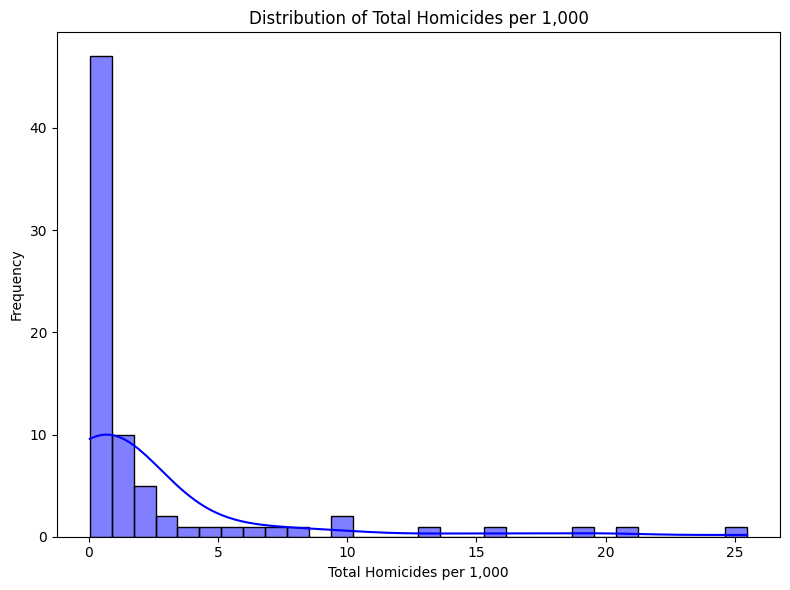

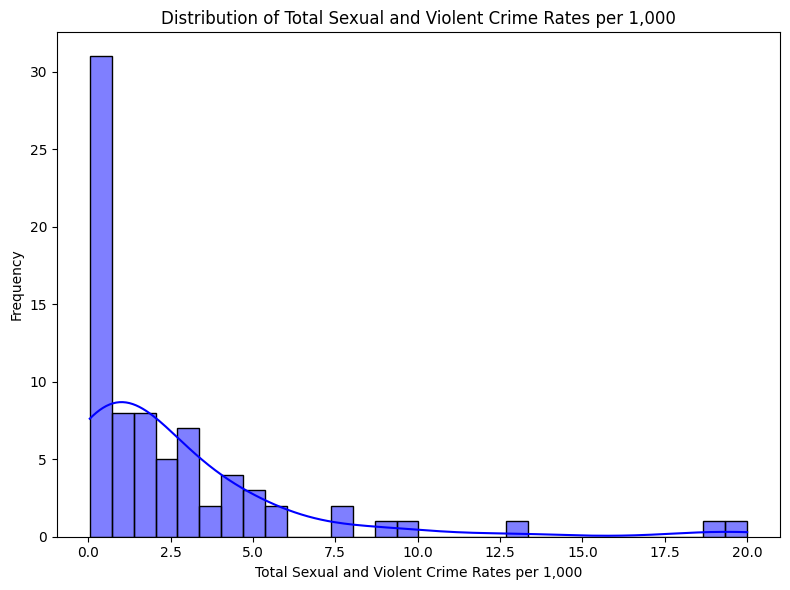

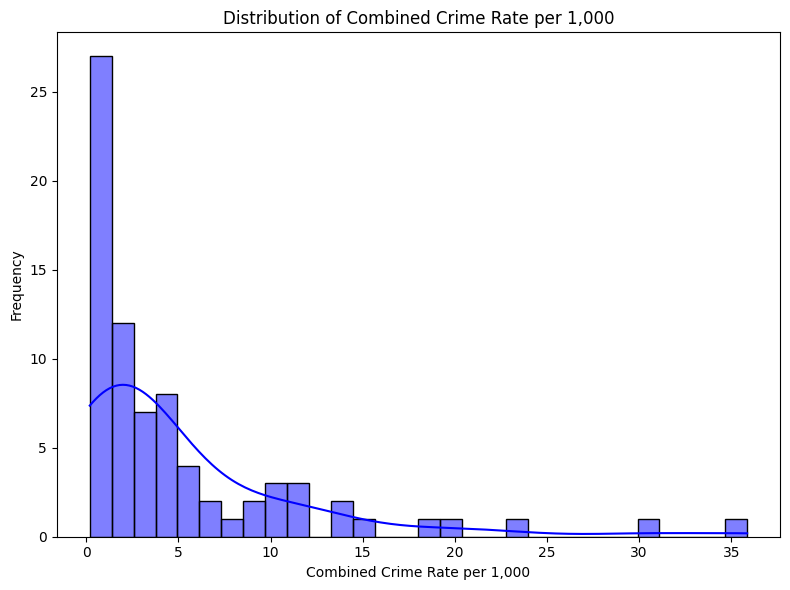

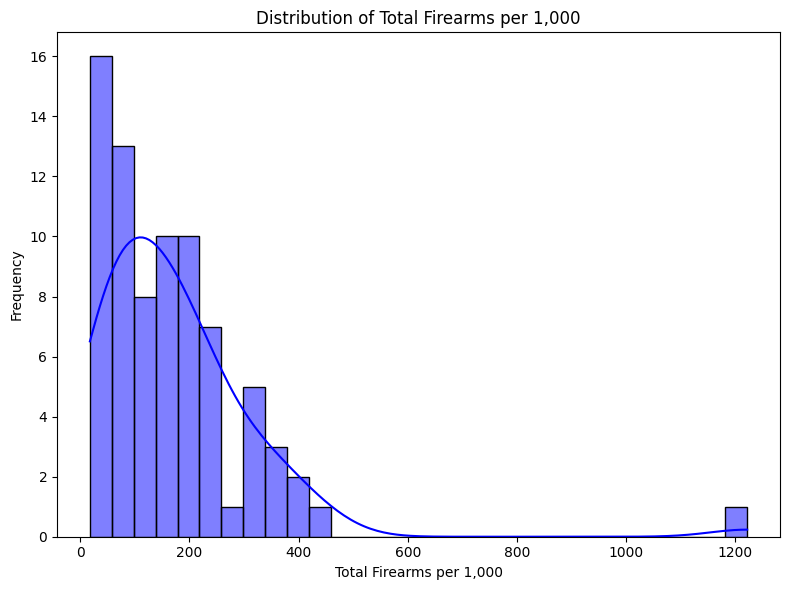

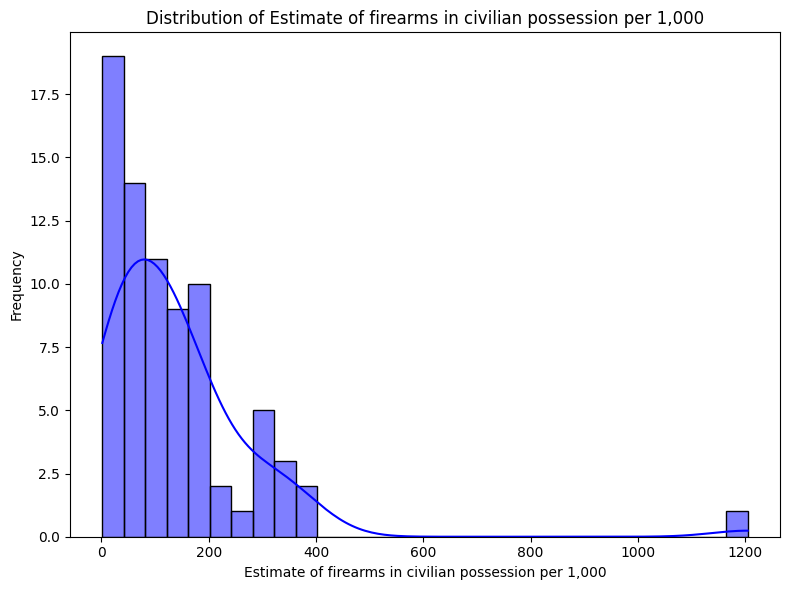

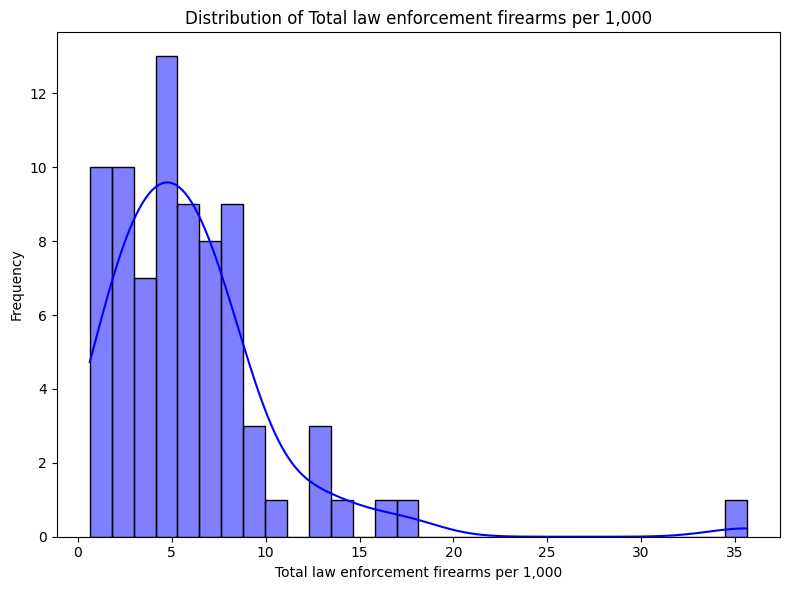

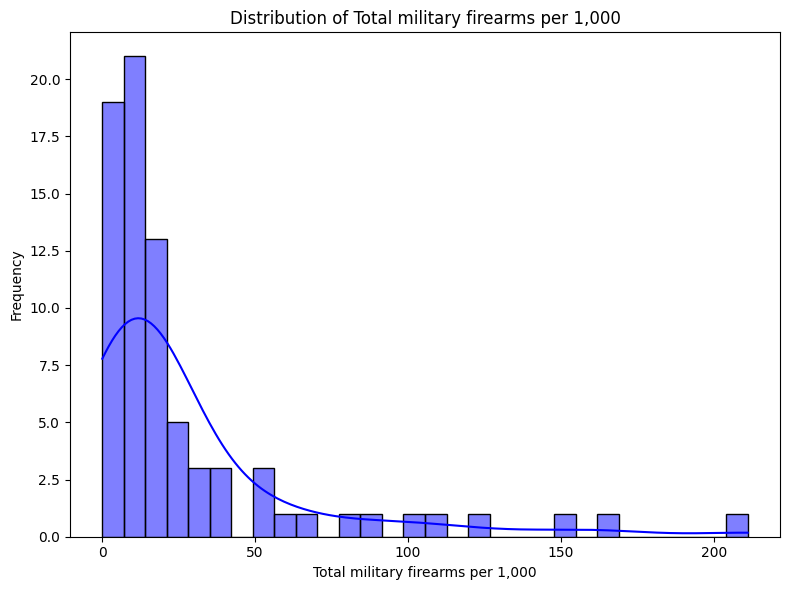

In [77]:
# We use the columns with the per 1000 data
columns_per_1000 = [
    "Total Homicides per 1,000",
    "Total Sexual and Violent Crime Rates per 1,000",
    "Combined Crime Rate per 1,000",
    "Total Firearms per 1,000",
    "Estimate of firearms in civilian possession per 1,000",
    "Total law enforcement firearms per 1,000",
    "Total military firearms per 1,000"
]

# And now we create histograms to visualize distribution of data
for column in columns_per_1000:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

World map for the crime andd total weapons

<Figure size 2500x2000 with 0 Axes>

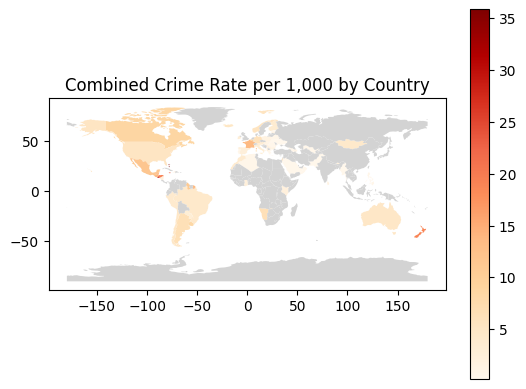

<Figure size 2500x2000 with 0 Axes>

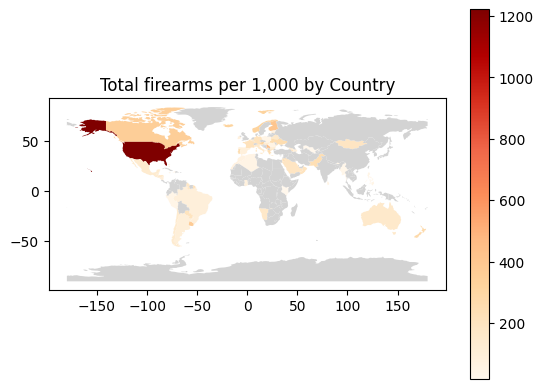

In [78]:
# Create world maps
file_path = "../new-data/geo/ne_110m_admin_0_countries.shx" # world map data
world = gpd.read_file(file_path)
world = world.rename(columns={"NAME": "Country"})

# Merge data with world map
map_data = world.merge(data, on="Country", how="left")

# Plot Combined Crime Rate per 1,000
plt.figure(figsize=(25, 20))
map_data.plot(
    column="Combined Crime Rate per 1,000",
    cmap="OrRd",
    legend=True,
    missing_kwds={"color": "lightgrey", "label": "No data"},
)
plt.title("Combined Crime Rate per 1,000 by Country")
plt.show()

# Plot Total firearms per 1,000 by Country
plt.figure(figsize=(25, 20))
map_data.plot(
    column="Total Firearms per 1,000",
    cmap="OrRd",
    legend=True,
    missing_kwds={"color": "lightgrey", "label": "No data"},
)
plt.title("Total firearms per 1,000 by Country")
plt.show()

## **Analyses of RQs**

### **First off - grouping countries:**
*Group counties in 3 categories based on the total number of weapons per 1000 ppl*

In [ ]:
data["Total Firearms Group"] = pd.qcut(
    data["Total Firearms per 1,000"], q=3, labels=["Low", "Medium", "High"]
)

data.head(10)

,ISO,Country,Continent,Subregion,Year,Population,Estimate of firearms in civilian possession,Total law enforcement firearms,Total military firearms,"Estimate of firearms in civilian possession per 1,000",...,Civilian Proportion,Military Proportion,Law Enforcement Proportion,Total_Firearms_Squared,Firearms_GDP_Interaction,Civilian_Firearms_Interaction,LawEnforcement_Firearms_Interaction,Military_Firearms_Interaction,Gov_to_Civilian_Ratio,Log_Gov_to_Civilian_Ratio
0,ALB,Albania,Europe,Southern Europe,2018,2911000.0,350000,19000,21750.0,120.233597,...,89.571337,5.566219,4.862444,18018.289585,7.091810e+08,120.233597,6.526967,7.471659,0.116429,0.110135
1,DZA,Algeria,Africa,Northern Africa,2018,41064000.0,877000,363000,637720.0,21.356906,...,46.705579,33.962465,19.331956,2090.928401,2.166449e+08,0.000000,0.000000,0.000000,1.141072,0.761307
2,ATG,Antigua and Barbuda,Americas,Latin America and the Caribbean,2018,94000.0,5000,800,438.0,53.191489,...,80.153895,7.021481,12.824623,4403.875509,1.172999e+09,0.000000,0.000000,0.000000,0.247600,0.221222
3,ARG,Argentina,Americas,Latin America and the Caribbean,2018,44272000.0,3256000,391000,679770.0,73.545356,...,75.252440,15.710796,9.036764,9551.450649,1.158553e+09,73.545356,8.831767,15.354400,0.328861,0.284322
4,ARM,Armenia,Asia,Western Asia,2018,3032000.0,186000,18000,509240.0,61.345646,...,26.078178,71.398127,2.523695,55336.665889,9.665483e+08,184.036939,17.810026,503.865435,2.834624,1.344071
5,AUS,Australia,Oceania,Australia and New Zealand,2018,24642000.0,3573000,69000,214520.0,144.996348,...,92.648294,5.562528,1.789178,24492.846993,9.068054e+09,289.992695,5.600195,17.410924,0.079351,0.076360
6,AUT,Austria,Europe,Western Europe,2018,8592000.0,2577000,37900,240880.0,299.930168,...,90.238044,8.434823,1.327133,110474.223786,1.750788e+10,899.790503,13.233240,84.106145,0.108180,0.102719
7,AZE,Azerbaijan,Asia,Western Asia,2018,9974000.0,362000,18000,537920.0,36.294365,...,39.436988,58.602057,1.960955,8469.756744,4.347124e+08,36.294365,1.804692,53.932224,1.535691,0.930466
8,BHS,Bahamas,Americas,Latin America and the Caribbean,2018,397000.0,74000,5000,2470.0,186.397985,...,90.830981,3.031791,6.137228,42112.829217,6.521260e+09,372.795970,25.188917,12.443325,0.100946,0.096170
9,BRB,Barbados,Americas,Latin America and the Caribbean,2018,286000.0,10000,2000,1675.0,34.965035,...,73.126143,12.248629,14.625229,2286.244132,9.412331e+08,0.000000,0.000000,0.000000,0.367500,0.312984


**Visualize the relationships between firearm-related variables and different crime types using scatterplots with fitted regression lines.** This tests whether the relationship between crime and weapons is (non-)linear

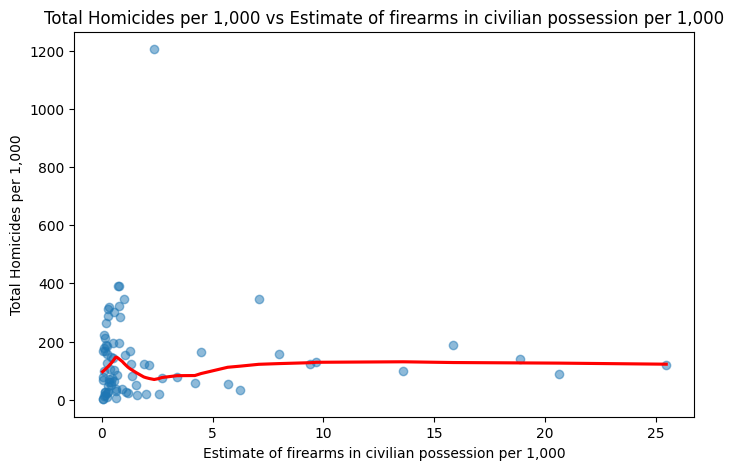

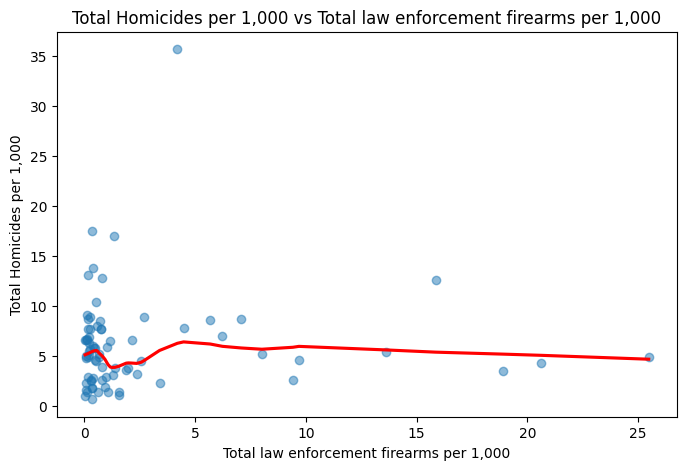

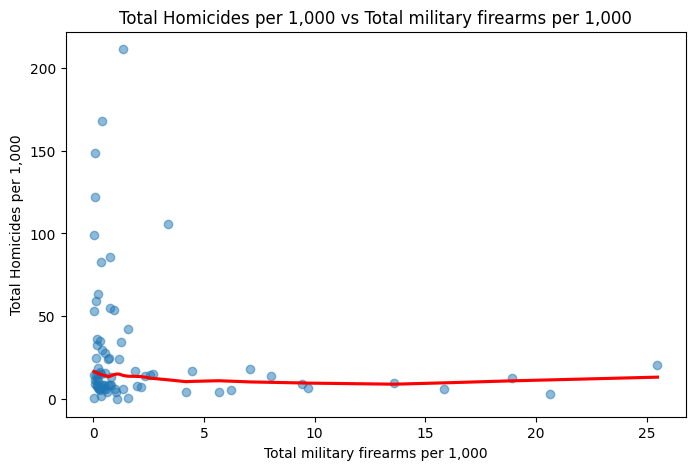

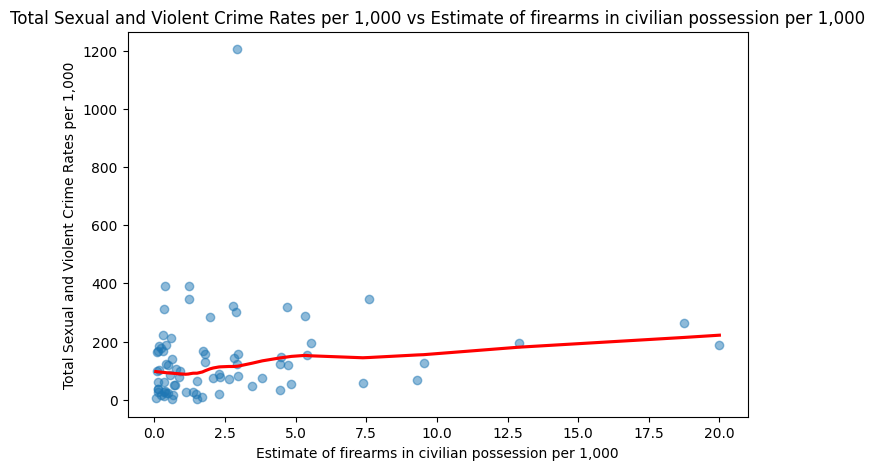

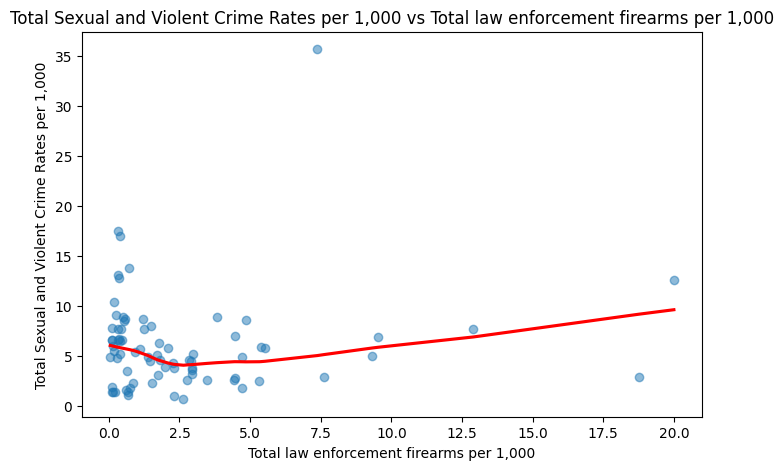

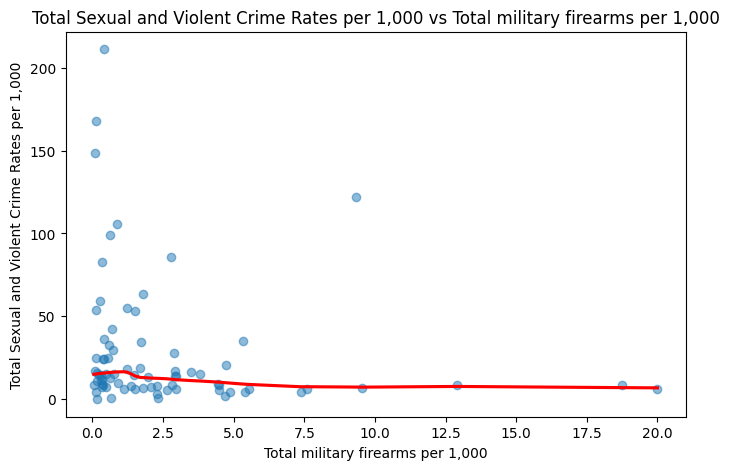

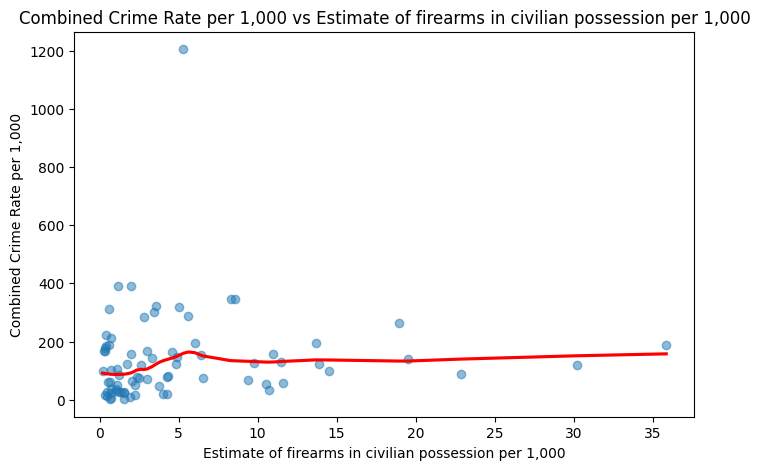

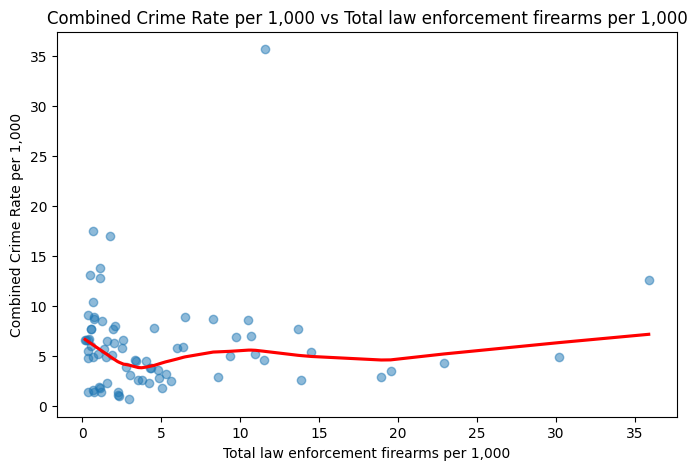

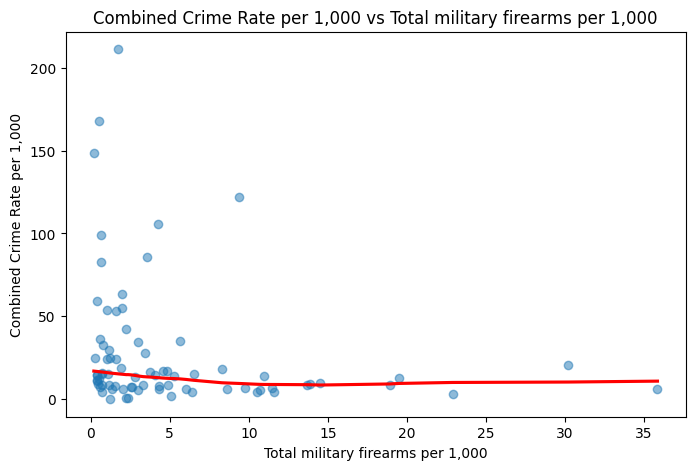

In [95]:
# List of firearm-related variables
firearm_columns = [
    "Estimate of firearms in civilian possession per 1,000",
    "Total law enforcement firearms per 1,000",
    "Total military firearms per 1,000"
]

# Crime variables
crime_types = [
    "Total Homicides per 1,000",
    "Total Sexual and Violent Crime Rates per 1,000",
    "Combined Crime Rate per 1,000"
]

for crime in crime_types:
    for firearm in firearm_columns:
        plt.figure(figsize=(8, 5))
        sns.regplot(x=data[crime], y=data[firearm], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}, lowess=True)
        plt.title(f"{crime} vs {firearm}")
        plt.xlabel(f"{firearm}")
        plt.ylabel(f"{crime}")
        plt.show()

Plot to get an idea for each group how the weapons are roughly distributed

/var/folders/07/1h78q6dd1jv28c8bsv9ztx140000gn/T/ipykernel_93317/4263442305.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_means_within_group = data.groupby("Total Firearms Group")[


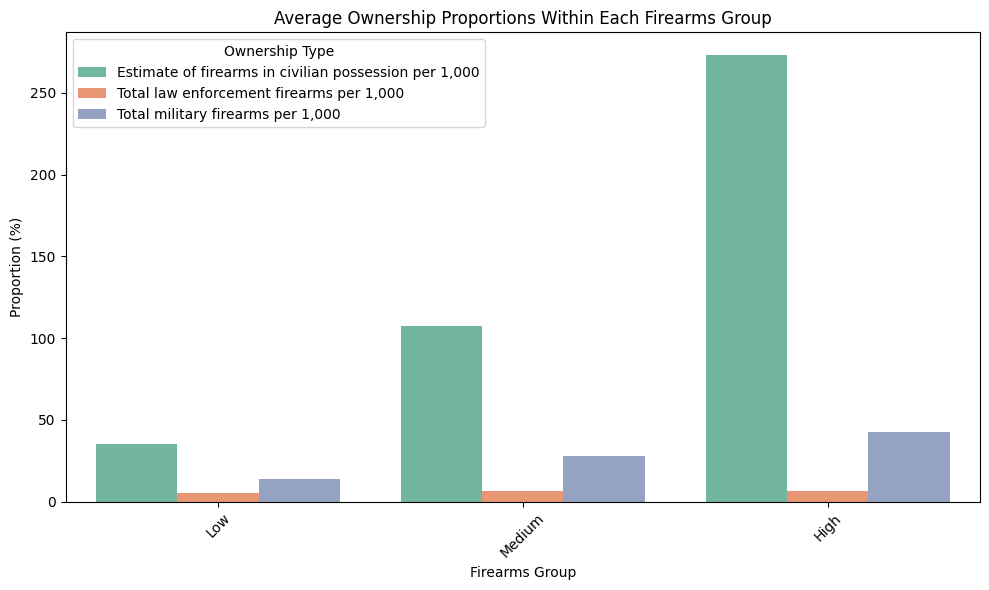

In [96]:
# Compute mean crime rates by firearm group & ownership proportions
crime_means_within_group = data.groupby("Total Firearms Group")[
    ["Estimate of firearms in civilian possession per 1,000",
    "Total law enforcement firearms per 1,000",
    "Total military firearms per 1,000",
     "Total Homicides per 1,000", 
     "Total Sexual and Violent Crime Rates per 1,000", "Combined Crime Rate per 1,000"]
].mean().reset_index()

# Plot bar chart for ownership proportions
plt.figure(figsize=(10, 6))
ownership_melted = crime_means_within_group.melt(id_vars="Total Firearms Group", value_vars=["Estimate of firearms in civilian possession per 1,000",
    "Total law enforcement firearms per 1,000",
    "Total military firearms per 1,000"])
sns.barplot(data=ownership_melted, x="Total Firearms Group", y="value", hue="variable", palette="Set2")

plt.title("Average Ownership Proportions Within Each Firearms Group")
plt.xlabel("Firearms Group")
plt.ylabel("Proportion (%)")
plt.legend(title="Ownership Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Analysis for Question 1.**
### Is there a statistically significant relationship between the total number of weapons per 1000 ppl and the types of crime (investigate for each crime separately and in total)

NB. We used the correlation as a preliminary analysis but we drew conclusions based on the regression.

Correlations between weapons and crime types:
{'Total Homicides per 1,000': -0.037330999825714604, 'Total Sexual and Violent Crime Rates per 1,000': 0.12020625637442964, 'Combined Crime Rate per 1,000': 0.038990344818663335}


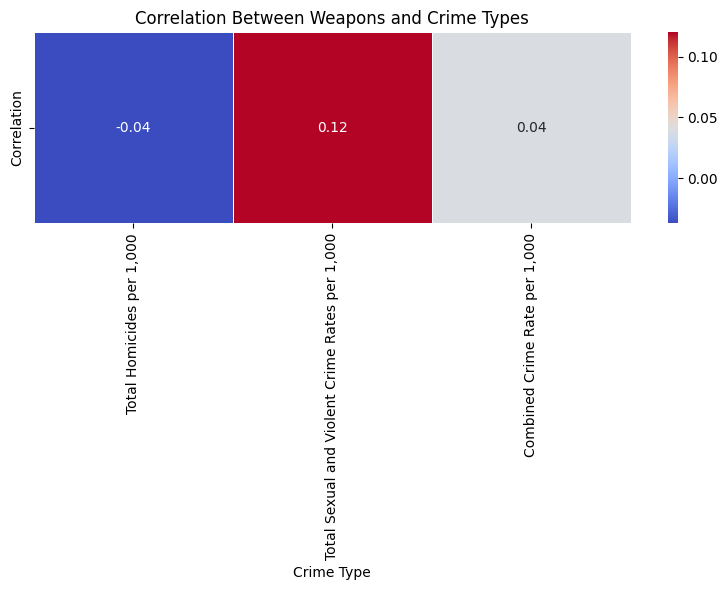

In [82]:
# General Relationship Between Weapons and Crime Types
crime_columns = ["Total Homicides per 1,000", "Total Sexual and Violent Crime Rates per 1,000", "Combined Crime Rate per 1,000"]
weapon_column = "Total Firearms per 1,000"

# Correlations between weapons and crime types
correlations = {}
for crime in crime_columns:
    correlation, _ = pearsonr(data[weapon_column], data[crime])
    correlations[crime] = correlation

print("Correlations between weapons and crime types:")
print(correlations)

# Create heatmap
correlation_data = pd.DataFrame(list(correlations.items()), columns=["Crime Type", "Correlation"])
plt.figure(figsize=(8, 6))  
sns.heatmap(
    correlation_data.set_index("Crime Type").T,
    annot=True,
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Correlation Between Weapons and Crime Types")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Scatterplots to see the relationship between total weapons vs each crime type for the countries in different groups.

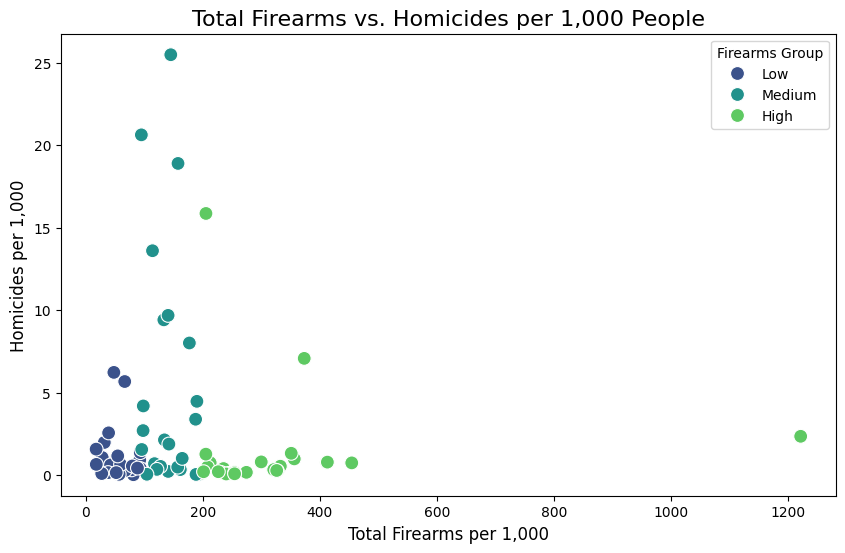

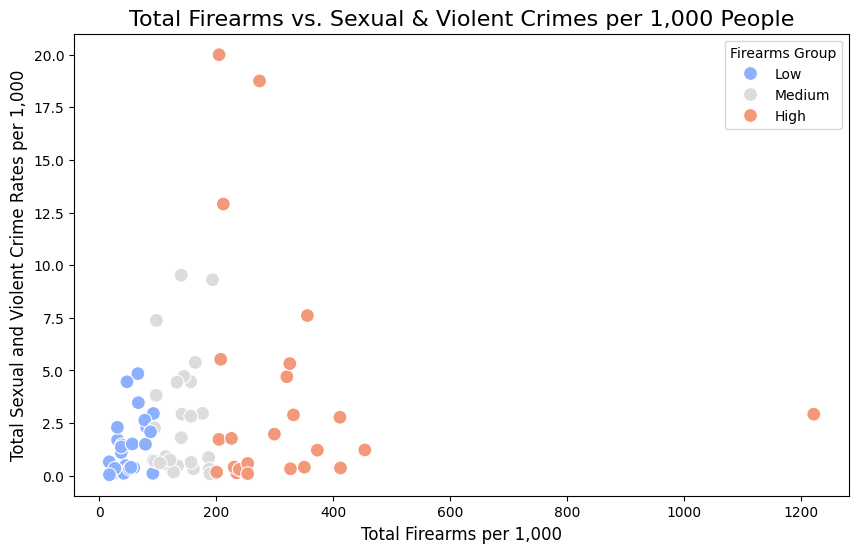

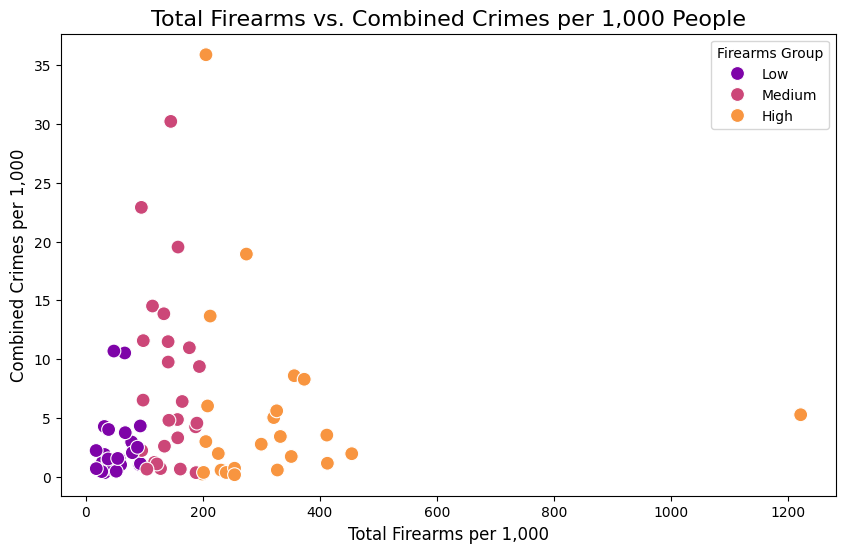

In [118]:
# Scatterplot: Total firearms vs. Homicides
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Total Firearms per 1,000", 
    y="Total Homicides per 1,000", 
    data=data, 
    hue="Total Firearms Group", 
    palette="viridis", 
    s=100
)
plt.title("Total Firearms vs. Homicides per 1,000 People", fontsize=16)
plt.xlabel("Total Firearms per 1,000", fontsize=12)
plt.ylabel("Homicides per 1,000", fontsize=12)
plt.legend(title="Firearms Group")
plt.show()

# Repeat for Violent Crimes
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Total Firearms per 1,000", 
    y="Total Sexual and Violent Crime Rates per 1,000", 
    data=data, 
    hue="Total Firearms Group", 
    palette="coolwarm", 
    s=100
)
plt.title("Total Firearms vs. Sexual & Violent Crimes per 1,000 People", fontsize=16)
plt.xlabel("Total Firearms per 1,000", fontsize=12)
plt.ylabel("Total Sexual and Violent Crime Rates per 1,000", fontsize=12)
plt.legend(title="Firearms Group")
plt.show()

# Repeat for Total Crimes
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Total Firearms per 1,000", 
    y="Combined Crime Rate per 1,000", 
    data=data, 
    hue="Total Firearms Group", 
    palette="plasma", 
    s=100
)
plt.title("Total Firearms vs. Combined Crimes per 1,000 People", fontsize=16)
plt.xlabel("Total Firearms per 1,000", fontsize=12)
plt.ylabel("Combined Crimes per 1,000", fontsize=12)
plt.legend(title="Firearms Group")
plt.show()

Regression analysis for total number of weapons vs different crime types. GDP is included too as a confounding variable.

The analysis uses a Negative Binomial regression, which is appropriate for count-based crime data that typically exhibit overdispersion (variance > mean). The model includes the main effect of total firearms to examine whether higher firearm ownership increases or decreases crime rates. For combined crime rates, a quadratic term is included to capture potential non-linear relationships, where the effect of firearms on crime may change as firearm levels increase. Additionally, an interaction term between firearms and GDP tests whether the relationship between firearm ownership and crime varies depending on a country’s economic conditions.

In [84]:
# Define crimes and results storage
crime_types = [
    "Total Homicides per 1,000", 
    "Total Sexual and Violent Crime Rates per 1,000", 
    "Combined Crime Rate per 1,000"
]
nb_results_final = {}

data["Total_Firearms_Squared"] = data["Total Firearms per 1,000"]**2
# Interaction term for exploring varying relationships based on economic conditions
data["Firearms_GDP_Interaction"] = data["Total Firearms per 1,000"] * data["Country GDP per 1,000"]

for crime in crime_types:
    if crime == "Combined Crime Rate per 1,000":
        X = data[[
            "Total Firearms per 1,000", 
            "Total_Firearms_Squared", 
            "Country GDP per 1,000", 
            "Firearms_GDP_Interaction"
        ]]
    else:
        X = data[[
            "Total Firearms per 1,000", 
            "Country GDP per 1,000", 
            "Firearms_GDP_Interaction"
        ]]
    
    X = sm.add_constant(X) 
    y = data[crime] 

    try:
        # Fit Negative Binomial regression NBR
        model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()
        nb_results_final[crime] = model.summary()
    except Exception as e:
        print(f"Skipping {crime} due to error: {e}")

for crime, result in nb_results_final.items():
    print(f"\nNegative Binomial Regression Results for {crime}:\n")
    print(result)


Negative Binomial Regression Results for Total Homicides per 1,000:

                     Generalized Linear Model Regression Results                     
Dep. Variable:     Total Homicides per 1,000   No. Observations:                   77
Model:                                   GLM   Df Residuals:                       73
Model Family:               NegativeBinomial   Df Model:                            3
Link Function:                           Log   Scale:                          1.0000
Method:                                 IRLS   Log-Likelihood:                -154.49
Date:                       Thu, 30 Jan 2025   Deviance:                       96.589
Time:                               19:10:00   Pearson chi2:                     169.
No. Iterations:                           12   Pseudo R-squ. (CS):             0.1777
Covariance Type:                   nonrobust                                         
                               coef    std err          z      P>|z|  

/opt/miniconda3/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


### **Summary of results in a table for the slides**

| **Dependent Variable**                                  | **Significant Predictors**                | **Direction of Effect**                       | **Key Findings/Interpretation**                                                                                         |
|--------------------------------------------------------|--------------------------------------------|-----------------------------------------------|--------------------------------------------------------------------------------------------------------------------------|
| **Total Homicides per 1,000**                          | - **Country GDP per 1,000** (**p = 0.001**) | Negative effect                              | Higher GDP per 1,000 people is associated with **lower homicide rates**, but **total firearms** have **no significant effect**. |
| **Total Sexual and Violent Crime Rates per 1,000**     | - **Country GDP per 1,000** (**p = 0.001**) | Positive effect                              | Higher GDP per 1,000 is associated with **higher rates of sexual and violent crimes**. No significant relationship with firearms. |
| **Combined Crime Rate per 1,000**                      | - **Total_Firearms_Squared** (**p = 0.050**) | Non-linear relationship (U-shaped possibly)          | The quadratic term suggests a **non-linear relationship**: at very low or very high firearm levels, combined crime rates can be affected. Interaction with GDP is marginally significant (**p = 0.068**). |

# **Analysis for Question 2.**

**For each group, what is the correlation of the different weapon owenrship types with crime:**

NB. We used the correlation as a preliminary analysis but we drew conclusions based on the regression.

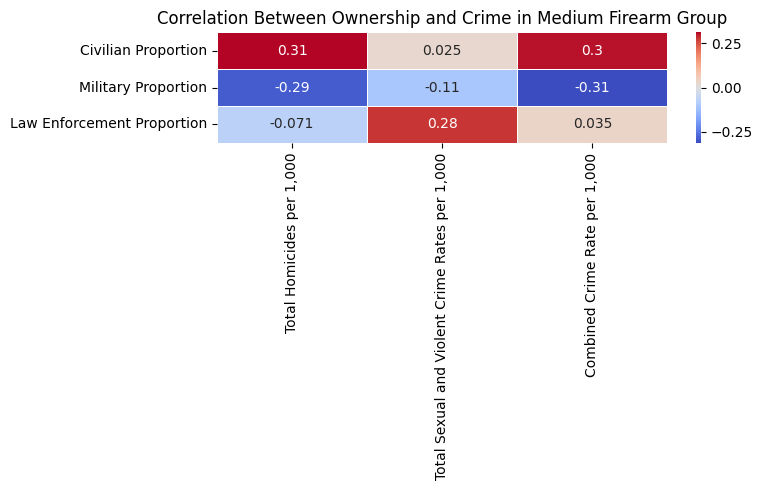

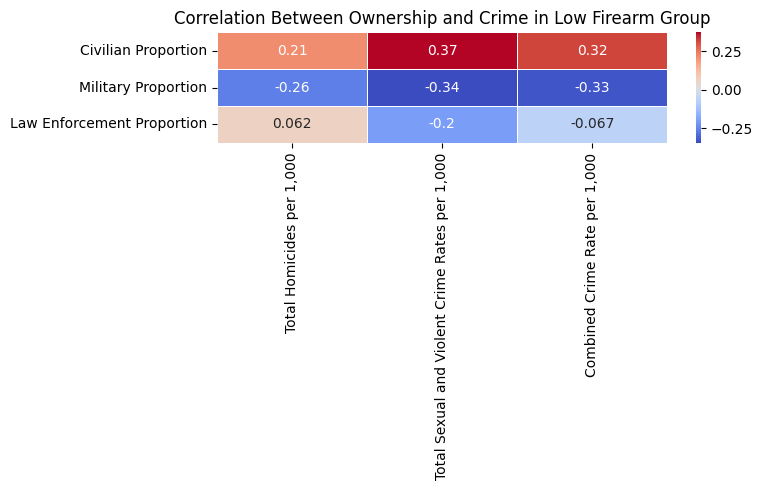

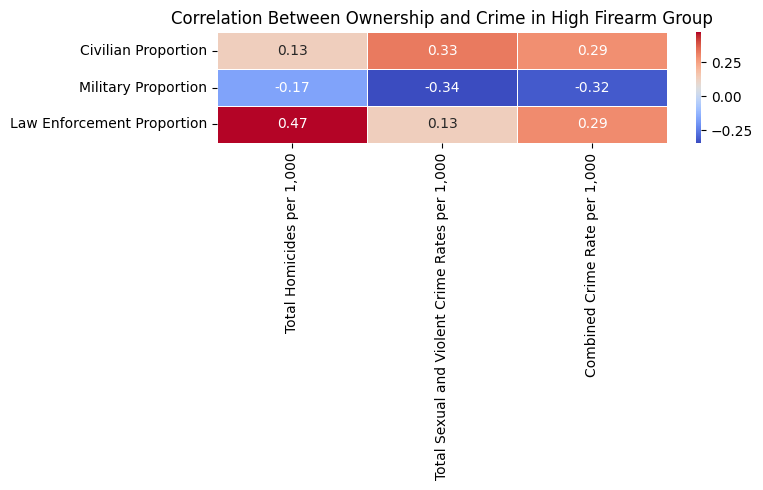

In [97]:
within_group_correlation_dict = {}

for group in data["Total Firearms Group"].unique():
    subset = data[data["Total Firearms Group"] == group]  # Filter data per group
    
    # Compute correlation matrix
    correlation_matrix = subset[["Civilian Proportion", "Military Proportion", "Law Enforcement Proportion",
                                 "Total Homicides per 1,000", 
                                 "Total Sexual and Violent Crime Rates per 1,000", "Combined Crime Rate per 1,000"]].corr()

    # Extract only ownership vs. crime correlations
    ownership_crime_correlation = correlation_matrix.loc[
        ["Civilian Proportion", "Military Proportion", "Law Enforcement Proportion"], 
        ["Total Homicides per 1,000",
         "Total Sexual and Violent Crime Rates per 1,000", "Combined Crime Rate per 1,000"]
    ]
    
    within_group_correlation_dict[group] = ownership_crime_correlation

    # heatmap
    plt.figure(figsize=(8, 5))
    sns.heatmap(ownership_crime_correlation, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title(f"Correlation Between Ownership and Crime in {group} Firearm Group")
    plt.xticks(rotation=90)
    plt.yticks(rotation=00)
    plt.tight_layout()
    plt.show()

**Below is the statistical testing. We used Negative Binomial Regression again.**

In [108]:
group_results = {}
group_coefficients = {}

# for each group
for group in data["Total Firearms Group"].unique():
    group_data = data[data["Total Firearms Group"] == group]
    
    # independent variables 
    X = group_data[[
        "Estimate of firearms in civilian possession per 1,000",
        "Total law enforcement firearms per 1,000",
        "Total military firearms per 1,000",
        "Country GDP per 1,000"
    ]]
    X = sm.add_constant(X)

    # for each crime type
    for crime in ["Total Homicides per 1,000", "Total Sexual and Violent Crime Rates per 1,000", "Combined Crime Rate per 1,000"]:
        y = group_data[crime]
        
        # fit the Negative Binomial regression
        model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()
        
        group_results[(group, crime)] = model
        group_coefficients[group] = model.params
        
        print(f"\nNegative Binomial Regression Results for Group: {group}, Crime Type: {crime}\n")
        print(model.summary())


Negative Binomial Regression Results for Group: Medium, Crime Type: Total Homicides per 1,000

                     Generalized Linear Model Regression Results                     
Dep. Variable:     Total Homicides per 1,000   No. Observations:                   25
Model:                                   GLM   Df Residuals:                       20
Model Family:               NegativeBinomial   Df Model:                            4
Link Function:                           Log   Scale:                          1.0000
Method:                                 IRLS   Log-Likelihood:                -56.971
Date:                       Fri, 31 Jan 2025   Deviance:                       15.780
Time:                               00:05:17   Pearson chi2:                     13.4
No. Iterations:                           10   Pseudo R-squ. (CS):             0.6040
Covariance Type:                   nonrobust                                         
                                            

/opt/miniconda3/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersio

Below is the ANOVA and post-hoc Tukey test to examine whether the differences between coefficients across different groups are significant. The Tukey test tells us which groups exactly differ, if any.

In [115]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Coefficients for each crime type and firearm group
coefficients = {
    "Homicides": {
        "Low": [0.0026, -0.0294, 0.0782],
        "Medium": [0.0006, -0.0181, -0.0457],
        "High": [0.0015, -0.0101, 0.2803]
    },
    "Sexual and Violent Crimes": {
        "Low": [0.0144, -0.0092, 0.0093],
        "Medium": [0.0055, 0.0004, 0.0459],
        "High": [-0.0016, -0.0141, 0.0942]
    },
    "Combined Crime Rates": {
        "Low": [0.0095, -0.0168, 0.0269],
        "Medium": [0.0018, -0.0043, -0.0060],
        "High": [-0.0007, -0.0108, 0.1445]
    }
}

anova_data = []

for crime_type, group_data in coefficients.items():
    for group, coefs in group_data.items():
        for idx, coef in enumerate(coefs):
            weapon_type = ["Civilian", "Military", "Law Enforcement"][idx]
            anova_data.append([crime_type, group, weapon_type, coef])

df_anova = pd.DataFrame(anova_data, columns=["Crime_Type", "Group", "Weapon_Type", "Coefficient"])

anova_results = {}
posthoc_results = {}

for crime_type in df_anova["Crime_Type"].unique():
    crime_data = df_anova[df_anova["Crime_Type"] == crime_type]

    # perform Anova
    f_stat, p_value = stats.f_oneway(
        *[crime_data[crime_data["Group"] == g]["Coefficient"].values for g in ["Low", "Medium", "High"]]
    )
    anova_results[crime_type] = {"F-Statistic": f_stat, "p-value": p_value}

    # perform Tukey post-hoc test
    tukey = pairwise_tukeyhsd(
        endog=crime_data["Coefficient"],
        groups=crime_data["Group"] + "_" + crime_data["Weapon_Type"]
    )
    posthoc_results[crime_type] = tukey.summary()

anova_results_df = pd.DataFrame(anova_results).T
print("=== ANOVA Results ===")
print(anova_results_df)

for crime_type, summary in posthoc_results.items():
    print(f"\n=== Post-hoc Tukey Test for {crime_type} ===")
    print(summary)

=== ANOVA Results ===
                           F-Statistic   p-value
Homicides                     0.945882  0.439472
Sexual and Violent Crimes     0.241098  0.793026
Combined Crime Rates          0.697012  0.534332

=== Post-hoc Tukey Test for Homicides ===
              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
        group1                 group2         meandiff p-adj lower upper reject
-------------------------------------------------------------------------------
         High_Civilian   High_Law Enforcement   0.2788   nan   nan   nan  False
         High_Civilian          High_Military  -0.0116   nan   nan   nan  False
         High_Civilian           Low_Civilian   0.0011   nan   nan   nan  False
         High_Civilian    Low_Law Enforcement   0.0767   nan   nan   nan  False
         High_Civilian           Low_Military  -0.0309   nan   nan   nan  False
         High_Civilian        Medium_Civilian  -0.0009   nan   nan   nan  False
         High_Civil

/opt/miniconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/miniconda3/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Plotting the coefficients to observe the changes across groups

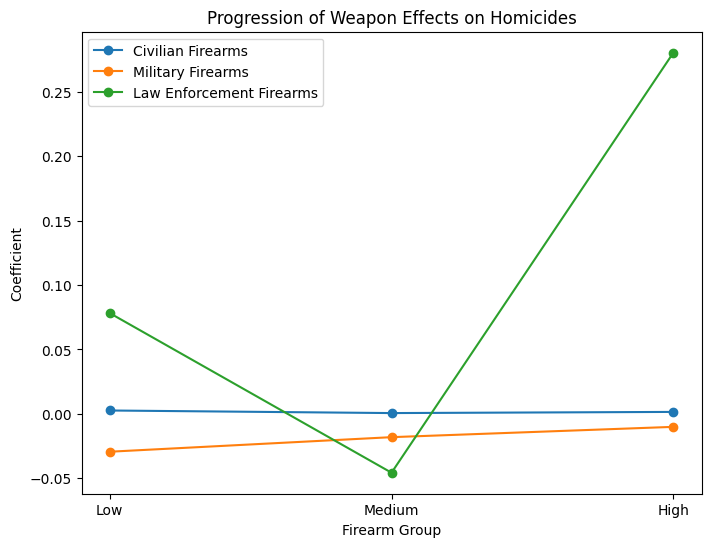

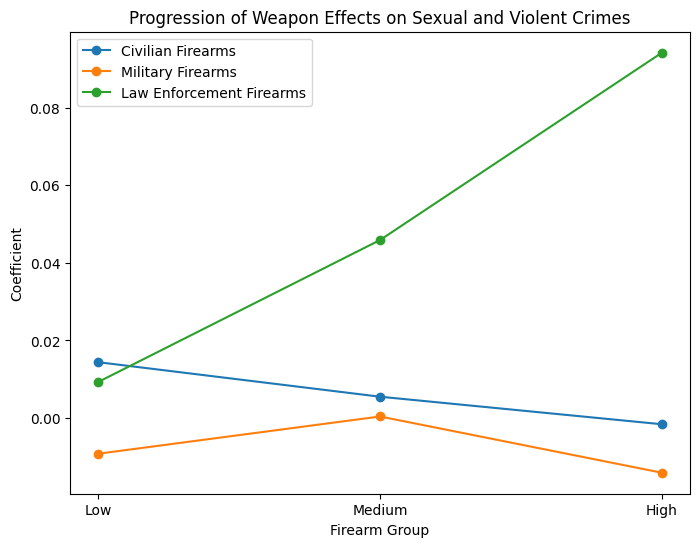

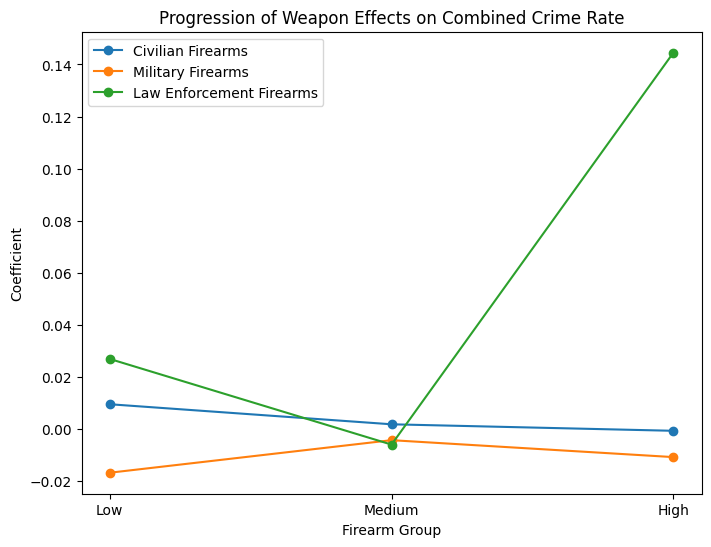

In [116]:
groups = ["Low", "Medium", "High"]

civilian_homicides = [0.0026, 0.0006, 0.0015]
civilian_sexual_violent = [0.0144, 0.0055, -0.0016]
civilian_combined = [0.0095, 0.0018, -0.0007]

military_homicides = [-0.0294, -0.0181, -0.0101]
military_sexual_violent = [-0.0092, 0.0004, -0.0141]
military_combined = [-0.0168, -0.0043, -0.0108]

law_enforcement_homicides = [0.0782, -0.0457, 0.2803]
law_enforcement_sexual_violent = [0.0093, 0.0459, 0.0942]
law_enforcement_combined = [0.0269, -0.0060, 0.1445]

def plot_progression(coefs_civilian, coefs_military, coefs_law_enforcement, title):
    plt.figure(figsize=(8, 6))
    plt.plot(groups, coefs_civilian, marker='o', linestyle='-', label='Civilian Firearms')
    plt.plot(groups, coefs_military, marker='o', linestyle='-', label='Military Firearms')
    plt.plot(groups, coefs_law_enforcement, marker='o', linestyle='-', label='Law Enforcement Firearms')
    plt.title(f'Progression of Weapon Effects on {title}')
    plt.xlabel('Firearm Group')
    plt.ylabel('Coefficient')
    plt.legend()
    plt.show()

plot_progression(civilian_homicides, military_homicides, law_enforcement_homicides, 'Homicides')
plot_progression(civilian_sexual_violent, military_sexual_violent, law_enforcement_sexual_violent, 'Sexual and Violent Crimes')
plot_progression(civilian_combined, military_combined, law_enforcement_combined, 'Combined Crime Rate')

- Higher coefficient = the stronger the relationship.
- A positive coefficient means that as the number of firearms (civilian, military, or law enforcement) increases, the crime rate also increases.
- A negative coefficient means that as the number of firearms increases, the crime rate decreases.

#### **Additional analysis: Investigate how the different ownership types affect the crimes as the total number of weapons increases, but this time not group-based but across the whole dataset:**

In [113]:
data["Civilian_Firearms_Interaction"] = data["Estimate of firearms in civilian possession per 1,000"] * data["Total Firearms per 1,000"]
data["LawEnforcement_Firearms_Interaction"] = data["Total law enforcement firearms per 1,000"] * data["Total Firearms per 1,000"]
data["Military_Firearms_Interaction"] = data["Total military firearms per 1,000"] * data["Total Firearms per 1,000"]

interaction_results = {}
interaction_coefficients = {}

crime_types = ["Total Homicides per 1,000", "Total Sexual and Violent Crime Rates per 1,000", "Combined Crime Rate per 1,000"]

# ind var
X = data[[
    "Estimate of firearms in civilian possession per 1,000",
    "Total law enforcement firearms per 1,000",
    "Total military firearms per 1,000",
    "Civilian_Firearms_Interaction",
    "LawEnforcement_Firearms_Interaction",
    "Military_Firearms_Interaction",
    "Country GDP per 1,000"
]]
X = sm.add_constant(X)

for crime in crime_types:
    y = data[crime]
    
    model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()
    
    interaction_results[crime] = model
    interaction_coefficients[crime] = model.params
    
    print(f"\nNegative Binomial Regression Results for Crime Type: {crime}\n")
    print(model.summary())


Negative Binomial Regression Results for Crime Type: Total Homicides per 1,000

                     Generalized Linear Model Regression Results                     
Dep. Variable:     Total Homicides per 1,000   No. Observations:                   77
Model:                                   GLM   Df Residuals:                       69
Model Family:               NegativeBinomial   Df Model:                            7
Link Function:                           Log   Scale:                          1.0000
Method:                                 IRLS   Log-Likelihood:                -147.74
Date:                       Fri, 31 Jan 2025   Deviance:                       83.084
Time:                               01:03:17   Pearson chi2:                     124.
No. Iterations:                           13   Pseudo R-squ. (CS):             0.3100
Covariance Type:                   nonrobust                                         
                                                           

/opt/miniconda3/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


*Distribution of crimes per group*

/var/folders/07/1h78q6dd1jv28c8bsv9ztx140000gn/T/ipykernel_93317/745255761.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Total Firearms Group", y=i, palette="coolwarm")


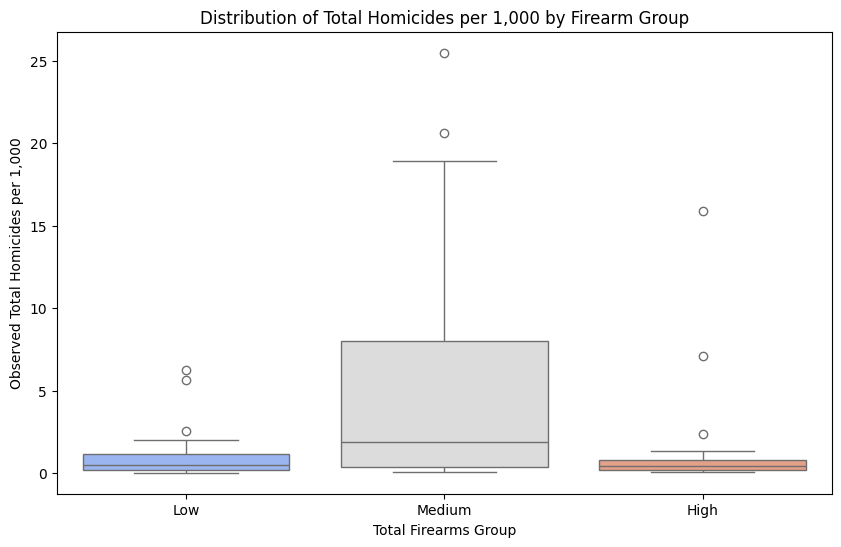

/var/folders/07/1h78q6dd1jv28c8bsv9ztx140000gn/T/ipykernel_93317/745255761.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Total Firearms Group", y=i, palette="coolwarm")


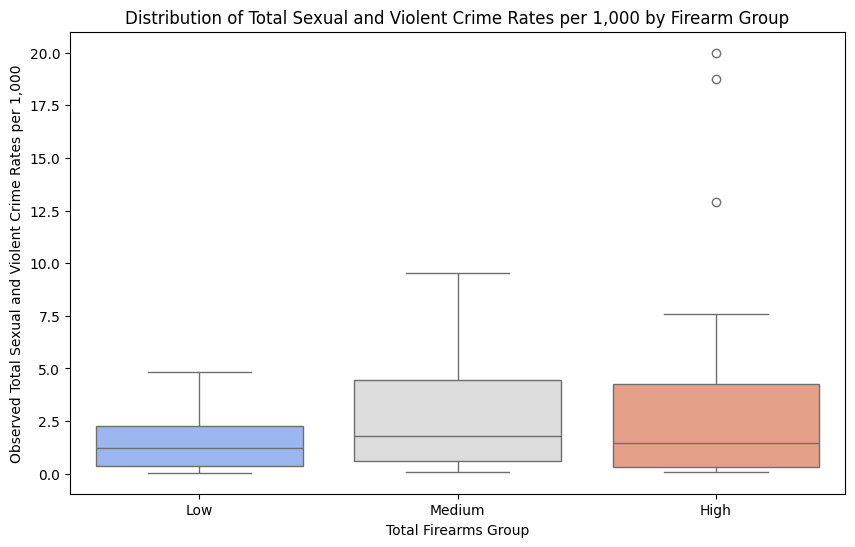

/var/folders/07/1h78q6dd1jv28c8bsv9ztx140000gn/T/ipykernel_93317/745255761.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Total Firearms Group", y=i, palette="coolwarm")


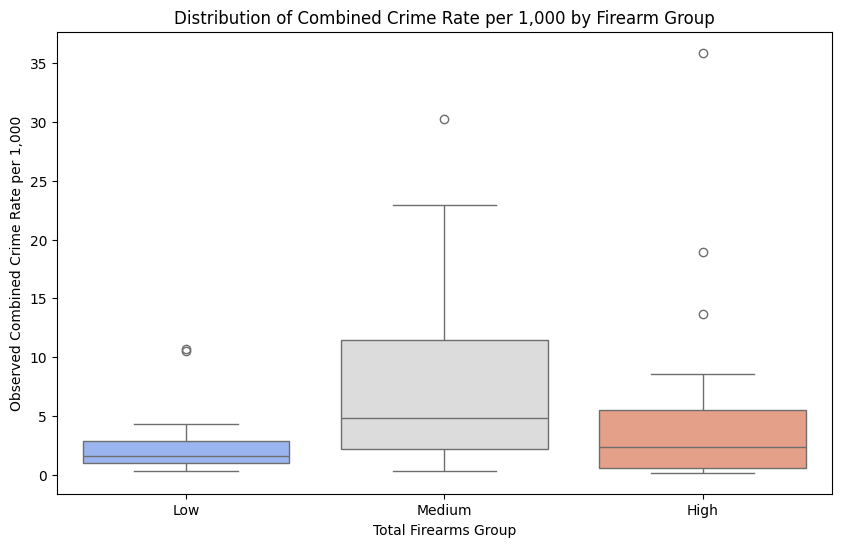

In [114]:
lst = ["Total Homicides per 1,000", "Total Sexual and Violent Crime Rates per 1,000", "Combined Crime Rate per 1,000"]

for i in lst: 
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x="Total Firearms Group", y=i, palette="coolwarm")
    plt.title(f"Distribution of {i} by Firearm Group")
    plt.xlabel("Total Firearms Group")
    plt.ylabel(f"Observed {i}")
    plt.show()

# **Check if GDP is a confounding variable**

Correlations between GDP and weapon types:
{'Estimate of firearms in civilian possession per 1,000': 0.3903721155543252, 'Total law enforcement firearms per 1,000': -0.1987490421888613, 'Total military firearms per 1,000': -0.012880103268226337}


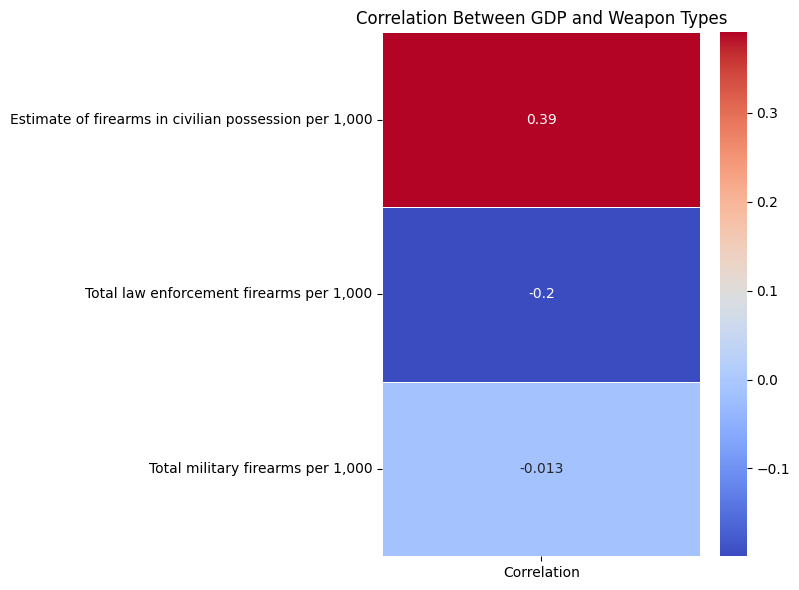

In [89]:
gdp_column = "Country GDP per 1,000"

# Correlations between GDP and crime stats
gdp_crime_correlations = {}
for crime in ["Estimate of firearms in civilian possession per 1,000", "Total law enforcement firearms per 1,000", "Total military firearms per 1,000"]:
    correlation, _ = pearsonr(data[gdp_column], data[crime])
    gdp_crime_correlations[crime] = correlation

print("Correlations between GDP and weapon types:")
print(gdp_crime_correlations)

# Create heatmap
correlation_df = pd.DataFrame.from_dict(gdp_crime_correlations, orient='index', columns=['Correlation'])
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_df,
    annot=True,
    cmap='coolwarm',
    cbar=True,
    linewidths=0.5
)
plt.title("Correlation Between GDP and Weapon Types")
plt.tight_layout()
plt.show()

**Strong Positive Correlation – Wealthier countries have more civilian-owned firearms.**

Correlations between GDP and crime types:
{'Total Homicides per 1,000': -0.20059830123353528, 'Total Sexual and Violent Crime Rates per 1,000': 0.4052619463070541, 'Combined Crime Rate per 1,000': 0.07676359957457547}


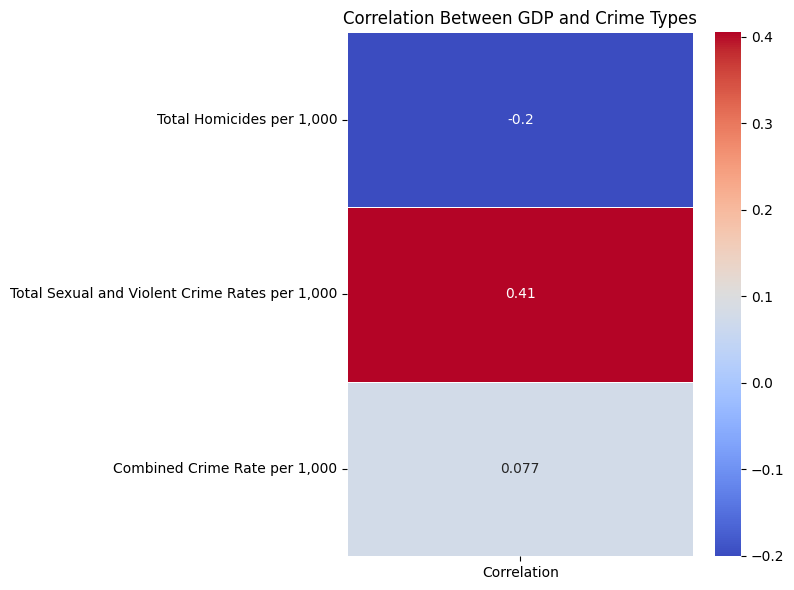

In [90]:
# GDP as a Confounding Variable
gdp_column = "Country GDP per 1,000"

# Correlations between GDP and crime stats
gdp_crime_correlations = {}
for crime in crime_columns:
    correlation, _ = pearsonr(data[gdp_column], data[crime])
    gdp_crime_correlations[crime] = correlation

print("Correlations between GDP and crime types:")
print(gdp_crime_correlations)

# Create heatmap
correlation_df = pd.DataFrame.from_dict(gdp_crime_correlations, orient='index', columns=['Correlation'])
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_df,
    annot=True,
    cmap='coolwarm',
    cbar=True,
    linewidths=0.5
)
plt.title("Correlation Between GDP and Crime Types")
plt.tight_layout()
plt.show()

### **Is GDP a Confounder?**  
1. GDP strongly correlates with civilian firearm ownership (*0.39*) => wealthier countries tend to have more civilian firearms.  
2. DP significantly correlates with certain crime types:
   - *Negative correlation with homicides (-0.2)* => Higher GDP countries have fewer homicides.
   - *Positive correlation with sexual crimes (0.56) and violent crimes (0.32)* => Wealthier countries report more of these crimes.


#### **We include GDP in all regressions above as a control variable**

##  **Question 3.**

**Create the ratio between the two and run regression to see if the effect is significant**

In [91]:
# Create the government-to-civilian ratio variable
data["Gov_to_Civilian_Ratio"] = (data["Total law enforcement firearms per 1,000"] + data["Total military firearms per 1,000"]) / data["Estimate of firearms in civilian possession per 1,000"]

gov_ratio_results = {}
crime_types = ["Total Homicides per 1,000",
               "Total Sexual and Violent Crime Rates per 1,000", "Combined Crime Rate per 1,000"]

# Define and fit the model for each crime type
for crime in crime_types:
    X = data[[
        "Gov_to_Civilian_Ratio",
        "Country GDP per 1,000" 
    ]]
    
    X = sm.add_constant(X)  
    y = data[crime]  
    model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()
    gov_ratio_results[crime] = model.summary()  
    
    print(f"\nNegative Binomial Regression Results for {crime} (Gov-to-Civilian Ratio Analysis):\n")
    print(model.summary())


Negative Binomial Regression Results for Total Homicides per 1,000 (Gov-to-Civilian Ratio Analysis):

                     Generalized Linear Model Regression Results                     
Dep. Variable:     Total Homicides per 1,000   No. Observations:                   77
Model:                                   GLM   Df Residuals:                       74
Model Family:               NegativeBinomial   Df Model:                            2
Link Function:                           Log   Scale:                          1.0000
Method:                                 IRLS   Log-Likelihood:                -148.50
Date:                       Thu, 30 Jan 2025   Deviance:                       84.593
Time:                               19:10:01   Pearson chi2:                 2.34e+10
No. Iterations:                           11   Pseudo R-squ. (CS):             0.2963
Covariance Type:                   nonrobust                                         
                            coef    s

/opt/miniconda3/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


### **result summary in table for the slides**

| **Dependent Variable**                                  | **Significant Predictors**                        | **Direction of Effect**                     | **Key Findings/Interpretation**                                                                                                                                                  |
|--------------------------------------------------------|--------------------------------------------------|---------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Total Homicides per 1,000**                          | - **Gov-to-Civilian Ratio** (**p = 0.001**)  <br> - **GDP** (**p = 0.000**) | Negative for ratio, negative for GDP       | **Higher Gov-to-Civilian ratios are associated with significantly lower homicide rates.** Higher GDP is also linked to reduced homicides, suggesting strong protective effects. |
| **Total Sexual and Violent Crime Rates per 1,000**     | - **GDP** (**p = 0.000**)                         | Positive for GDP, weak negative for ratio  | **Gov-to-Civilian ratio has a weak, non-significant negative effect (p = 0.122).** Higher GDP significantly increases sexual and violent crime rates, likely due to reporting factors. |
| **Combined Crime Rate per 1,000**                      | - **Gov-to-Civilian Ratio** (marginal, **p = 0.058**) | Weak negative effect                      | **A higher Gov-to-Civilian ratio weakly reduces combined crime rates (near significance).** The effect of GDP on combined crime rates is not statistically significant.          |

#### Making a plot of ther gov-to-civilian ratio and crime types

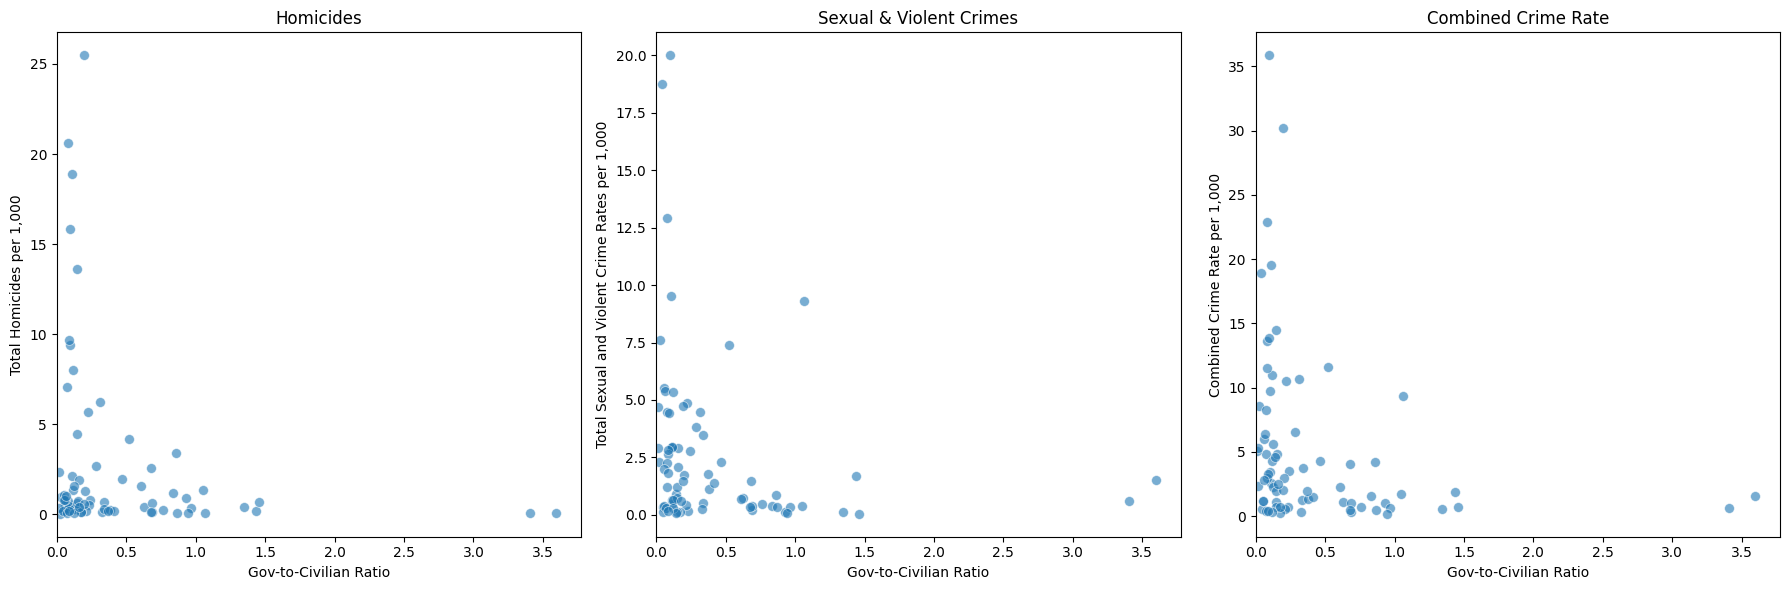

In [117]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# apply log transformation to the Gov-to-Civilian Ratio otherwise the points are very clustered
data["Log_Gov_to_Civilian_Ratio"] = np.log1p(data["Gov_to_Civilian_Ratio"]) 

# define crime types and titles
crime_types = ["Total Homicides per 1,000", "Total Sexual and Violent Crime Rates per 1,000", "Combined Crime Rate per 1,000"]
titles = ["Homicides", "Sexual & Violent Crimes", "Combined Crime Rate"]

for i, crime in enumerate(crime_types):
    sns.scatterplot(
        x=data["Log_Gov_to_Civilian_Ratio"],
        y=data[crime],
        alpha=0.6,
        s=50,
        ax=axes[i]
    )
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Gov-to-Civilian Ratio")
    axes[i].set_ylabel(crime)
    axes[i].set_xlim(0, None)  

plt.tight_layout()
plt.show()